In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('/content/data.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# Find null values in the dataset
null_values = data.isnull().sum()

print("Null values in the dataset:")
print(null_values)


Null values in the dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


**Forward Fill or Backward Fill**
For time-series data, you can use forward fill (filling null values with the previous non-null value) or backward fill (filling null values with the next non-null value).

In [6]:
# Forward fill
data_filled = data.fillna(method='ffill')

# Backward fill
data_filled = data.fillna(method='bfill')


<ipython-input-6-87bd5433a08b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')
<ipython-input-6-87bd5433a08b>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='bfill')


**Visualizations**

**A. Histograms for Numerical Columns**

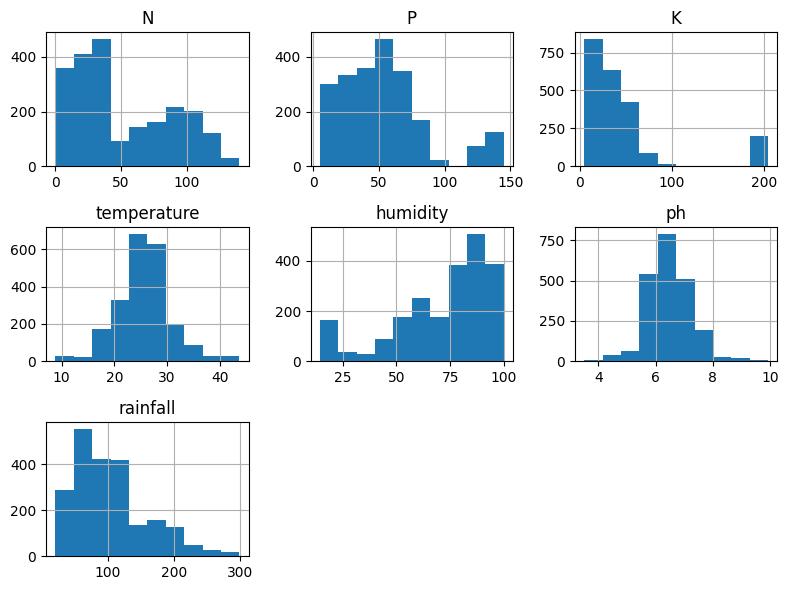

In [7]:
data.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()


**b. Boxplots for Numerical Columns**

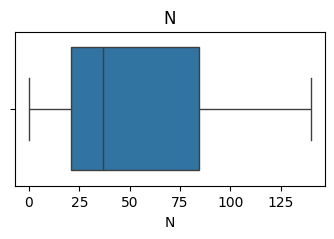

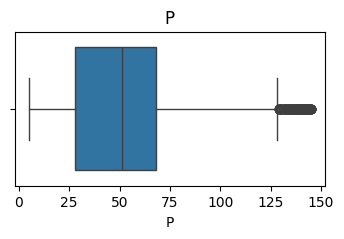

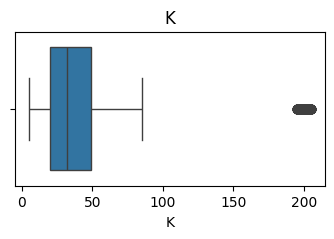

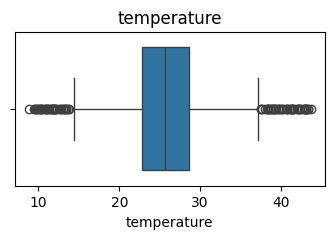

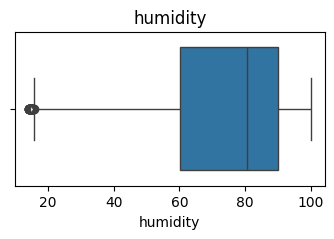

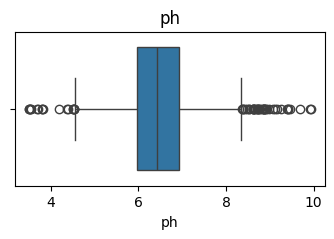

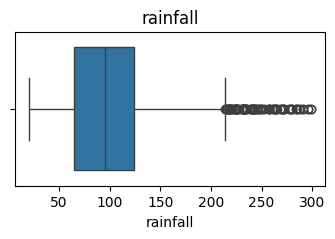

In [8]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()


**c. Countplots for Categorical Columns**

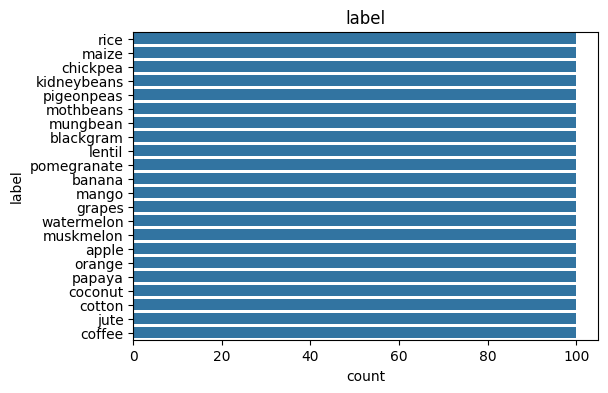

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data[col])
    plt.title(col)
    plt.show()


Value Count For Categorical Coulmns

In [10]:
for col in categorical_cols:
    print(data[col].value_counts())


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


**Check For Outliers:**
Outliers are data points that deviate significantly from the rest of the dataset, potentially distorting statistical analyses. They can be detected using statistical methods and may require special handling in data preprocessing.

In [11]:
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers:", outliers.sum())


Number of outliers: 432


**Result Matric**

In [12]:
# Splitting dataset into features (X) and target variable (y)
X = data.drop(columns=['label'])  #  'label' is the target variable
y = data['label']

In [13]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Feature scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # CALCULATE MEAN AND SD TO SCALE THE TRAINING DATA
X_test_scaled = scaler.transform(X_test)

In [15]:
# Initialize models
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
    # Add other algorithms as needed
}

**Training SVM, Random Forest And KNN Models**

In [16]:
# Training SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [17]:
# Training Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Training KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [19]:
# Calculate metrics for each model
models = {'SVM': svm_model, 'Random Forest': rf_model, 'KNN': knn_model}
metrics = {'Precision': precision_score,
           'Recall': recall_score,
           'F1 Score': f1_score}

results = {'Model': [], 'Metric': [], 'Score': []}

for model_name, model in models.items():
    for metric_name, metric_func in metrics.items():
        if metric_name == 'Precision':
            score = metric_func(y_test, model.predict(X_test_scaled), average='weighted')
        else:
            score = metric_func(y_test, model.predict(X_test_scaled), average='macro')
        results['Model'].append(model_name)
        results['Metric'].append(metric_name)
        results['Score'].append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
# Convert results to DataFrame
df_results = pd.DataFrame(results)


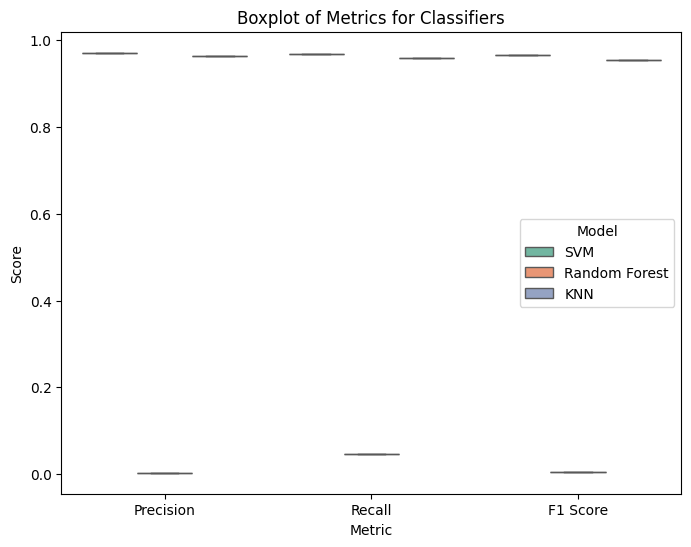

In [21]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Score', hue='Model', data=df_results, palette='Set2')
plt.title('Boxplot of Metrics for Classifiers')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

**Training And Tesing Model using Dataset**

In [22]:
# Train and test models
accuracies = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, predictions)

In [23]:
# Choose best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
best_accuracy = accuracies[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.2f}")

The best model is Random Forest with an accuracy of 0.99


In [24]:
# Taking input from the user
nitrogen = float(input("Enter nitrogen level: "))
potassium = float(input("Enter potassium level: "))
phosphorus = float(input("Enter phosphorus level: "))
temperature = float(input("Enter temperature: "))
humidity = float(input("Enter humidity: "))
ph_value = float(input("Enter pH value: "))
rainfall = float(input("Enter rainfall: "))

Enter nitrogen level: 67
Enter potassium level: 56
Enter phosphorus level: 89
Enter temperature: 35
Enter humidity: 40
Enter pH value: 8
Enter rainfall: 300


In [25]:
# Make predictions using the best model
input_data = [[nitrogen, potassium, phosphorus, temperature, humidity, ph_value, rainfall]]
input_data_scaled = scaler.transform(input_data)  # If using scaled features
predicted_crop = best_model.predict(input_data_scaled)
print("Recommended crop:", predicted_crop[0])

Recommended crop: coffee


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
